In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

**Load the Dataset**

In [23]:
df_full = pd.read_csv('/content/myntra_dataset_ByScraping.csv')

**Exploring the data**

In [6]:
df_full.shape

(16519, 7)

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         16519 non-null  object 
 1   pants_description  16519 non-null  object 
 2   price              16519 non-null  float64
 3   MRP                16519 non-null  float64
 4   discount_percent   16518 non-null  float64
 5   ratings            16518 non-null  float64
 6   number_of_ratings  16518 non-null  float64
dtypes: float64(5), object(2)
memory usage: 903.5+ KB


In [8]:
df_full.describe()

,price,MRP,discount_percent,ratings,number_of_ratings
count,16519.000000,16519.000000,16518.000000,16518.000000,16518.000000
mean,1368.166899,2898.291240,1.762240,3.970335,94.557695
std,782.664561,1228.843067,5.084219,0.439173,439.926223
min,376.000000,35.000000,0.030000,1.000000,5.000000
25%,847.000000,2199.000000,0.420000,3.800000,15.000000
50%,1304.000000,2799.000000,0.550000,4.000000,31.000000
75%,1623.000000,3399.000000,0.650000,4.200000,73.000000
max,21599.000000,35999.000000,58.980000,5.000000,22300.000000


In [9]:
df_full.head()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0


In [10]:
df_full.iloc[-5:]

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
16514,glitchez,Men Slouchy Fit Pleated Jeans,483.0,2199.0,0.78,4.0,63.0
16515,HERE&NOW,Men Slim Fit Jeans,2066.0,3899.0,0.47,1.5,8.0
16516,Flying Machine,Slim Fit Stretchable Jeans,1829.0,2999.0,0.39,1.5,8.0
16517,RARE RABBIT,Men Slim Fit Cotton Jeans,3023.0,5399.0,0.44,3.9,39.0
16518,HERE&NOW,Men Mid-Rise Straight Jeans,1799.0,35.0,NaN,NaN,NaN


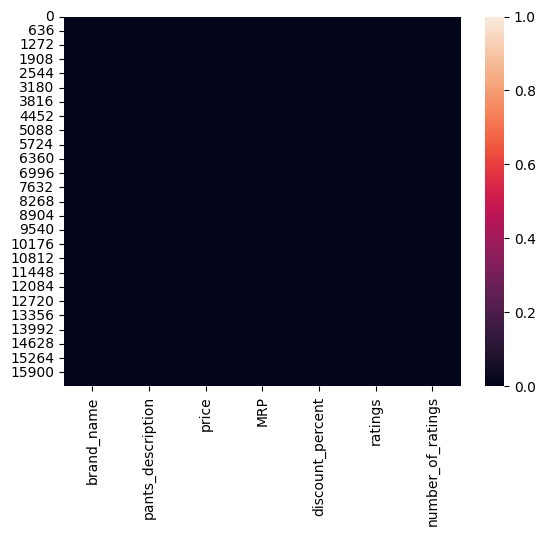

In [11]:
sns.heatmap(df_full.isnull());

**Data Cleaning**

In [12]:
df = df_full.copy()

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle missing values
critical_cols = ['brand_name', 'pants_description', 'price', 'mrp']
df_clean = df.dropna(subset=critical_cols)

# Fill missing ratings, number of ratings and discount%
if 'ratings' in df.columns:
    df.fillna({'ratings': df['ratings'].median()}, inplace=True)
if 'number_of_ratings' in df.columns:
    df.fillna({'number_of_ratings': 0}, inplace=True)
if 'discount_percent' in df.columns:
    df.fillna({'discount_percent': 0}, inplace=True)


In [13]:
df.columns

Index(['brand_name', 'pants_description', 'price', 'mrp', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')

**EDA**

In [14]:
print("Total Sale :",df['price'].sum())
print("Avg Sale :",df['price'].mean())

Total Sale : 22600749.0
Avg Sale : 1368.166898722683


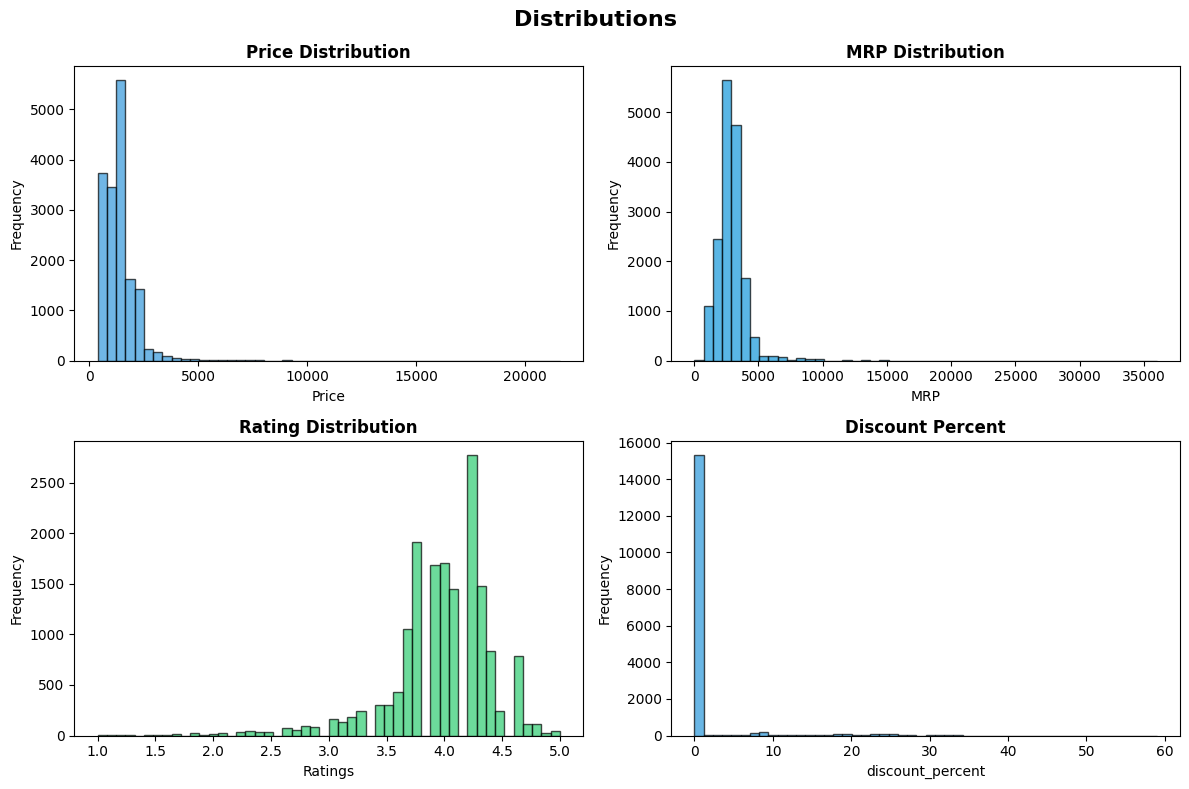

In [15]:
#Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distributions', fontsize=16, fontweight='bold')

# 1. Price Distribution
axes[0, 0].hist(df['price'], bins=50, alpha=0.7, color='#3498db', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# 2. MRP distribution
axes[0, 1].hist(df['mrp'], bins=50, alpha=0.7, color='#1498db', edgecolor='black')
axes[0, 1].set_title('MRP Distribution', fontweight='bold')
axes[0, 1].set_xlabel('MRP')
axes[0, 1].set_ylabel('Frequency')

# 3. Rating Distribution
axes[1, 0].hist(df['ratings'], bins=50, alpha=0.7, color='#2ecc71', edgecolor='black')
axes[1, 0].set_title('Rating Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Ratings')
axes[1, 0].set_ylabel('Frequency')

# 4. Discount_percent distribution
axes[1, 1].hist(df['discount_percent'], bins=50, alpha=0.7, color='#2998db', edgecolor='black')
axes[1, 1].set_title('Discount Percent', fontweight='bold')
axes[1, 1].set_xlabel('discount_percent')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

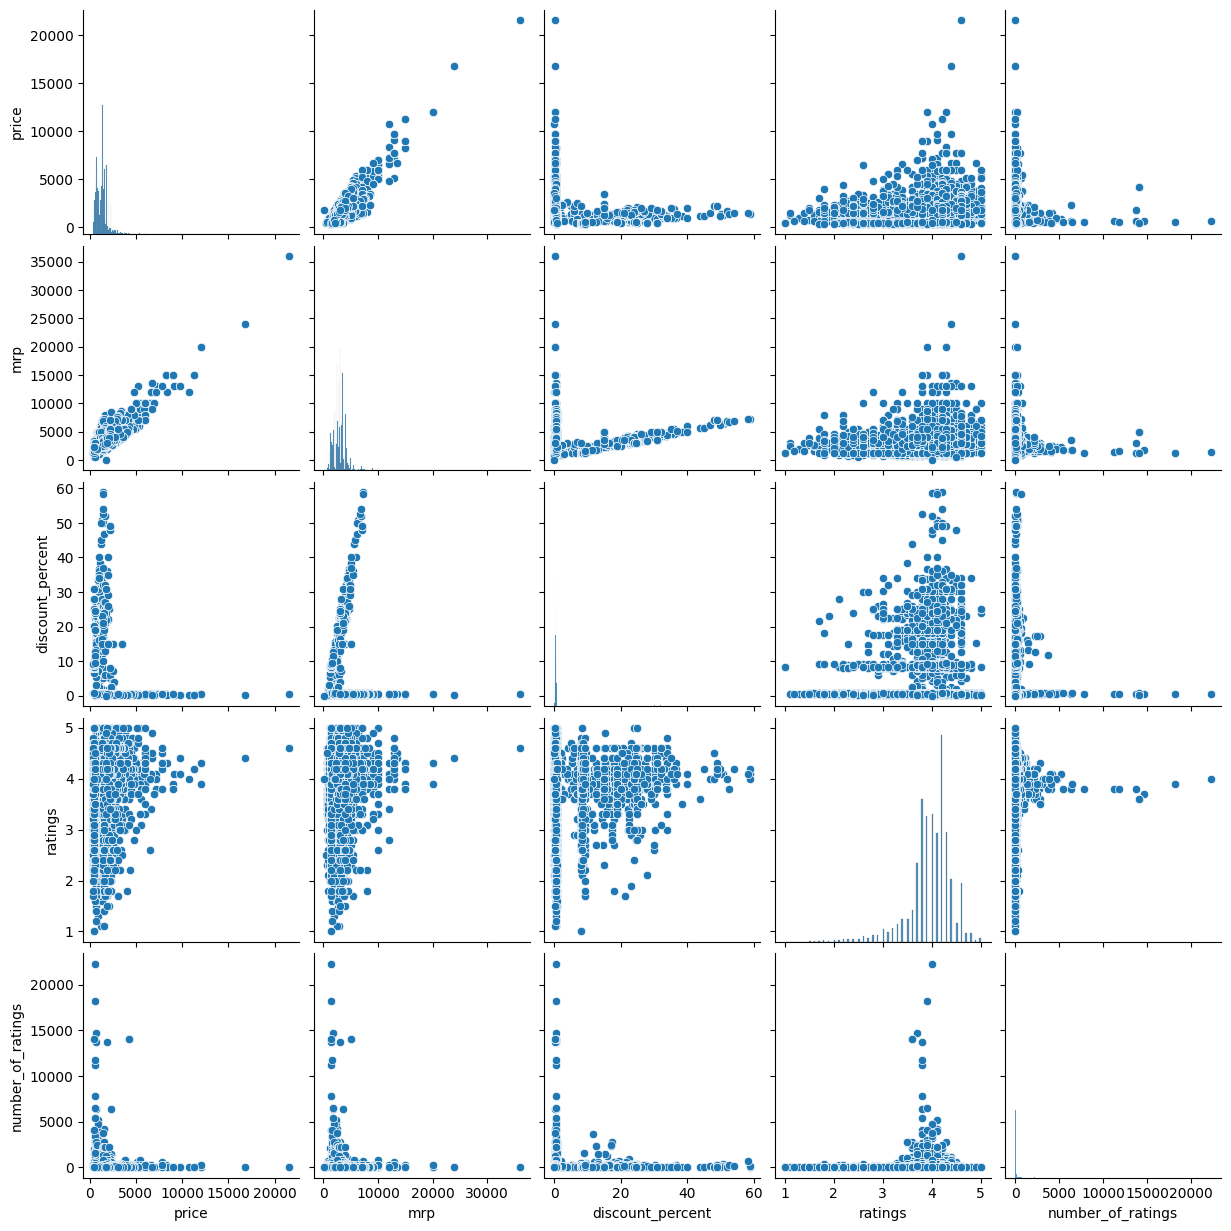

In [16]:
sns.pairplot(df)

Brand Analysis

In [17]:
brand_analysis = df.groupby(['brand_name']).agg({
                    'price': ['mean', 'median', 'count'],
                    'mrp': 'mean',
                    'number_of_ratings': 'sum',
                    'ratings': 'mean',
                    'discount_percent': 'mean'})
brand_analysis.columns = ['avg_price', 'median_price', 'sales_count',
                          'avg_mrp',
                          'total_ratings',
                          'avg_rating',
                          'avg_discount']

brand_analysis.head(10)

,avg_price,median_price,sales_count,avg_mrp,total_ratings,avg_rating,avg_discount
brand_name,,,,,,,
7OUNCE,1329.000000,1349.0,3,2999.000000,792.0,4.300000,0.556667
AD By Arvind,1828.176471,1689.0,17,2699.000000,625.0,4.070588,0.331765
ADBUCKS,1099.000000,1099.0,8,2499.000000,462.0,3.912500,14.000000
ADIDAS Originals,6399.000000,6399.0,2,8499.000000,25.0,4.100000,0.350000
AFLASH,839.909091,699.0,22,3271.545455,589.0,3.995455,24.316364
ALTIVA,1087.000000,1087.0,8,3399.000000,239.0,4.262500,0.680000
AMERICAN EAGLE OUTFITTERS,2994.425532,2759.0,94,4659.638298,19041.0,4.152128,0.363298
ANGERHOOD,510.205128,499.0,39,3091.307692,1407.0,3.866667,24.026154
ASHTOM,948.500000,898.5,4,2999.000000,144.0,3.800000,20.505000


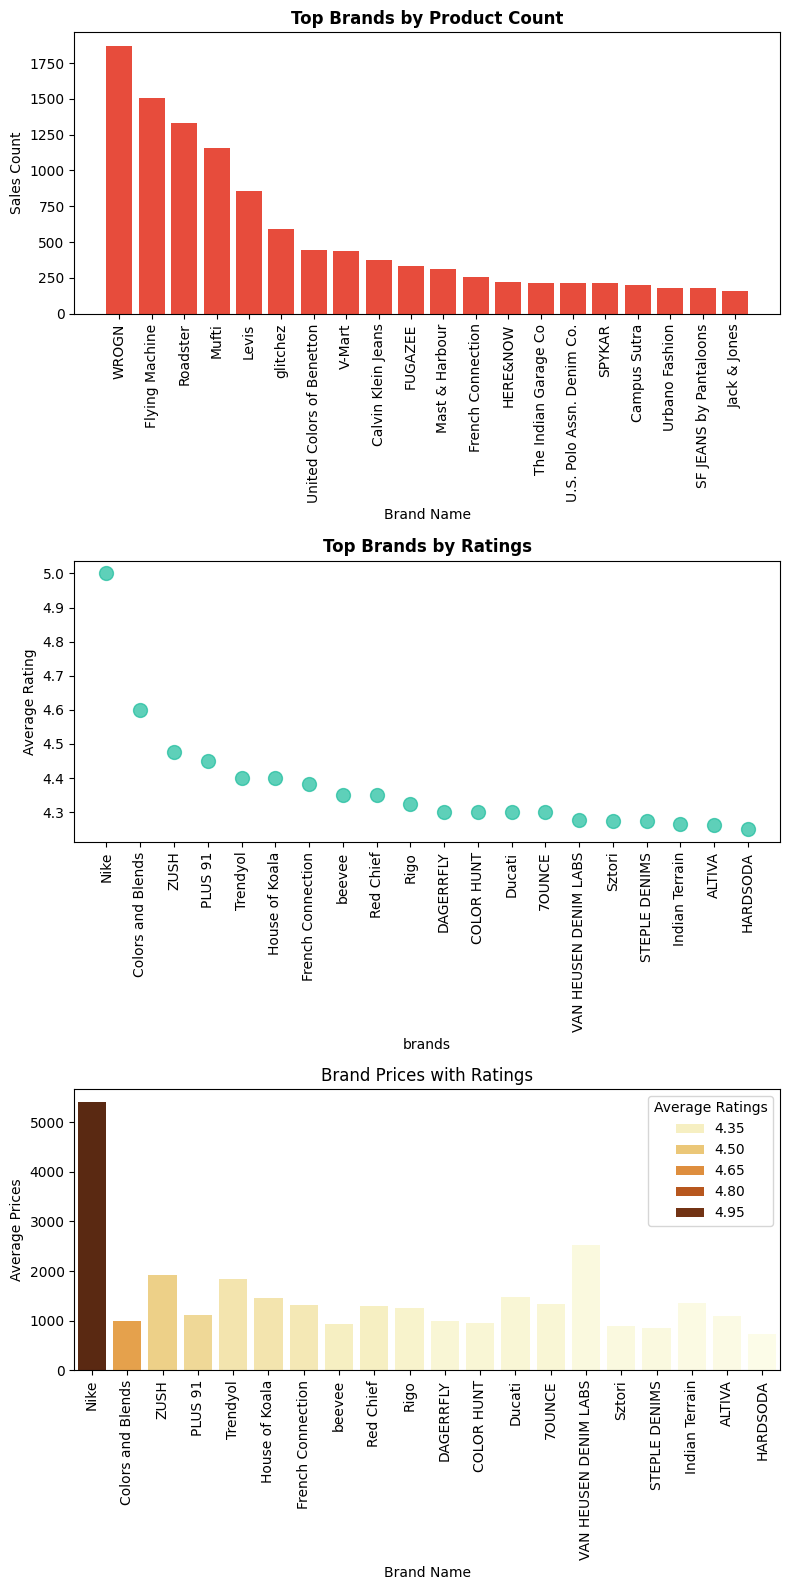

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# 1. Top Brands by Sales Count
top_brands = df['brand_name'].value_counts().head(20)
axes[0].bar(top_brands.index, top_brands.values, color='#e74c3c')
axes[0].set_title('Top Brands by Product Count', fontweight='bold')
axes[0].set_xlabel("Brand Name")
axes[0].set_ylabel("Sales Count")
axes[0].tick_params(axis='x', rotation=90)

# 2. Top Brands by Ratings
brand_rat = df.groupby('brand_name').ratings.agg(['mean']).sort_values(by='mean',ascending=False)
top_brand_perf = brand_rat.nlargest(20, 'mean')
axes[1].scatter(
    top_brand_perf.index,
    top_brand_perf['mean'],
    s=100, alpha=0.7, color='#1abc9c'
)
axes[1].set_title('Top Brands by Ratings', fontweight='bold')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('brands')
axes[1].set_ylabel('Average Rating')

# 3. Brand Performance (Rating vs Price)
top_brand_perf = df.groupby('brand_name').agg({'ratings': 'mean', 'price': 'mean'}).reset_index().sort_values(by='ratings', ascending=False).head(20)
sns.barplot(x=top_brand_perf['brand_name'], y=top_brand_perf['price'],
              hue=top_brand_perf["ratings"],
              ax=axes[2],
              palette="YlOrBr" )
plt.xticks(rotation=90)
plt.xlabel("Brand Name")
plt.ylabel("Average Prices")
plt.title("Brand Prices with Ratings")
plt.legend(title="Average Ratings")

fig.tight_layout()
plt.show()

Price, Rating and Discount Analysis

/tmp/ipython-input-3593099303.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_potential_df = df.groupby(['price_category', df['ratings'].round()]).agg(
/tmp/ipython-input-3593099303.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  revenue_pivot = revenue_potential_df.pivot_table(


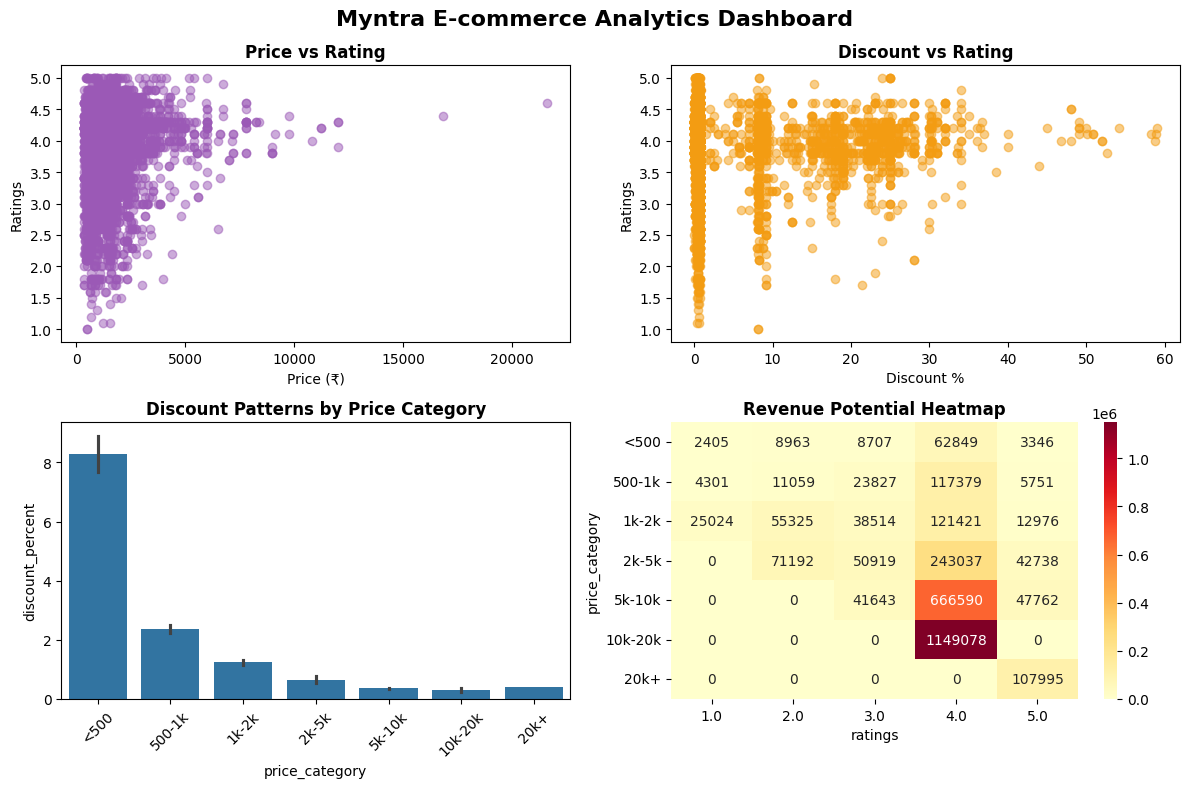

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Myntra E-commerce Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Price vs Rating
axes[0, 0].scatter(df['price'], df['ratings'], alpha=0.5, color='#9b59b6')
axes[0, 0].set_title('Price vs Rating', fontweight='bold')
axes[0, 0].set_xlabel('Price (₹)')
axes[0, 0].set_ylabel('Ratings')

# 2. Discount vs Rating
axes[0, 1].scatter(df['discount_percent'], df['ratings'], alpha=0.5, color='#f39c12')
axes[0, 1].set_title('Discount vs Rating', fontweight='bold')
axes[0, 1].set_xlabel('Discount %')
axes[0, 1].set_ylabel('Ratings')


df['price_category'] = pd.cut(df['price'],
                                 bins = [0, 500, 1000, 2000, 5000, 10000, 20000, df['price'].max()],
                                labels = ['<500', '500-1k', '1k-2k', '2k-5k', '5k-10k', '10k-20k', '20k+'])

# 3. Discount Patterns by Category
sns.barplot(data=df, x='price_category', y='discount_percent', ax=axes[1,0])
axes[1,0].set_title('Discount Patterns by Price Category', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Revenue Potential Heatmap
if 'number_of_ratings' in df.columns and 'price' in df.columns:
    revenue_potential_df = df.groupby(['price_category', df['ratings'].round()]).agg(
        avg_price=('price', 'mean'),
        avg_num_ratings=('number_of_ratings', 'mean')
    ).reset_index()
    revenue_potential_df['revenue_potential'] = revenue_potential_df['avg_price'] * revenue_potential_df['avg_num_ratings']

    revenue_pivot = revenue_potential_df.pivot_table(
        values='revenue_potential',
        index='price_category',
        columns='ratings',
        aggfunc='sum'
    )

    sns.heatmap(revenue_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 1])
    axes[1, 1].set_title('Revenue Potential Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

**Statistical Analysis**

In [20]:
results = {}

# 1. Discount Impact on Ratings (T-test)
if 'discount_percent' in df.columns and 'ratings' in df.columns:
    median_discount = df['discount_percent'].median()
    high_discount = df[df['discount_percent'] > median_discount]['ratings']
    low_discount = df[df['discount_percent'] <= median_discount]['ratings']

    t_stat, p_value = stats.ttest_ind(high_discount.dropna(), low_discount.dropna())
    results['discount_impact'] = {
        'high_discount_mean': high_discount.mean(),
        'low_discount_mean': low_discount.mean(),
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    }

# 2. Price-Rating Regression
if 'price' in df.columns and 'ratings' in df.columns:
    regression_data = df[['price', 'ratings']].dropna()
    X, y = regression_data[['price']], regression_data['ratings']

    model = LinearRegression()
    model.fit(X, y)

    slope, intercept, r_value, p_value, std_err = stats.linregress(
        regression_data['price'], regression_data['ratings'])

    results['price_rating_regression'] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': r2_score(y, model.predict(X)),
        'p_value': p_value,
        'significant': p_value < 0.05
    }

# 3. Brand Pricing ANOVA
if 'brand_name' in df.columns and 'price' in df.columns:
    top_brands = df['brand_name'].value_counts().head(5).index
    brand_price_groups = [df[df['brand_name'] == brand]['price'].dropna() for brand in top_brands]

    f_stat, p_value = stats.f_oneway(*brand_price_groups)
    results['brand_pricing_anova'] = {
        'f_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    }

print(results['discount_impact'])
print(results['price_rating_regression'])
print(results['brand_pricing_anova'])

{'high_discount_mean': np.float64(3.9016539604600076), 'low_discount_mean': np.float64(4.030876993166288), 't_statistic': np.float64(-19.0780969371094), 'p_value': np.float64(2.8008406082197873e-80), 'significant': np.True_}
{'coefficient': np.float64(6.799497951768083e-05), 'intercept': np.float64(3.877308707225664), 'r_squared': 0.01468451593230402, 'p_value': np.float64(4.461390995600703e-55), 'significant': np.True_}
{'f_statistic': np.float64(3672.7033798423718), 'p_value': np.float64(0.0), 'significant': np.True_}


**Insights**

In [25]:
insights = {
        'pricing_strategy': {},
        'brand_performance': {},
        'recommendations': []
    }

# Pricing insights
if 'price_category' in df.columns:
    category_performance = df.groupby('price_category', observed=True).agg({
        'ratings': 'mean',
        'discount_percent': 'mean',
        'number_of_ratings': 'mean' if 'number_of_ratings' in df.columns else 'count'
    }).round(2)
    insights['pricing_strategy'] = category_performance

# Top performing brands
if not brand_analysis.empty:
    top_brands = brand_analysis.nlargest(5, 'avg_rating')
    insights['brand_performance'] = top_brands

# recommendations
if 'discount_impact' in results:
    if results['discount_impact']['significant']:
        insights['recommendations'].append("Discount strategy significantly impacts ratings")

if 'price_rating_regression' in results:
    coef = results['price_rating_regression']['coefficient']
    if coef < 0:
        insights['recommendations'].append("Higher prices correlate with lower ratings")
    else:
        insights['recommendations'].append("Brands with Higher prices correlate with higher ratings")

print(insights['pricing_strategy'])
print(insights['brand_performance'])

                ratings  discount_percent  number_of_ratings
price_category                                              
<500               3.74              8.29              96.23
500-1k             3.89              2.36             129.43
1k-2k              4.04              1.23              74.56
2k-5k              3.96              0.65              87.27
5k-10k             4.09              0.36              83.82
10k-20k            4.19              0.30              93.43
20k+               4.60              0.40               5.00
                   avg_price  median_price  sales_count  avg_mrp  \
brand_name                                                         
Nike                  5395.0        5395.0            1   5995.0   
Colors and Blends      999.0         999.0            1   3999.0   
ZUSH                  1927.5        1940.0            4   3550.0   
PLUS 91               1109.0        1109.0            2   2999.0   
House of Koala        1449.0        1449.0 

In [22]:
print("REPORT")
print("-" * 60)

# Key Metrics
total_products = len(df)
avg_price = df['price'].mean()
avg_rating = df['ratings'].mean()
avg_discount = df['discount_percent'].mean()

print(f"1. KEY METRICS")
print(f"   Total Products Analyzed: {total_products:,}")
print(f"   Average Price: ₹{avg_price:,.2f}")
print(f"   Average Rating: {avg_rating:.2f}/5.0")
print(f"   Average Discount: {avg_discount:.1f}%")
print()

# Top Performing Segments
print(f"2. TOP PERFORMANCES")
if 'price_category' in df.columns:
    best_category = df.groupby('price_category', observed=False)['ratings'].mean().idxmax()
    best_rating = df.groupby('price_category', observed=False)['ratings'].mean().max()
    print(f"   Best Price Category: {best_category} (Avg Rating: {best_rating:.2f})")

if 'brand_name' in df.columns:
    top_brand = df.groupby('brand_name')['price'].value_counts().idxmax()
    top_brand_sales = df.groupby('brand_name')['price'].value_counts().max()
    print(f"   Top Brand by Sales: {top_brand} (Avg Sales Count: {top_brand_sales:.2f})")

if 'brand_name' in df.columns:
    top_rated = df.groupby('brand_name')['ratings'].mean().idxmax()
    top_brand_rating = df.groupby('brand_name')['ratings'].mean().max()
    print(f"   Top Rated Brand: {top_rated} (Avg Rating: {top_brand_rating:.2f})")

print()

# Statistical Insights
print(f"3. STATISTICAL INSIGHTS")
for key, result in results.items():
    if isinstance(result, dict) and 'significant' in result:
        significance = "Significant" if result['significant'] else "Not Significant"
        print(f"   {key.replace('_', ' ').title()}: {significance}")

print()

# Recommendations
print(f"STRATEGIC RECOMMENDATIONS")
for i, rec in enumerate(insights['recommendations'], 1):
    print(f"   {i}. {rec}")

REPORT
------------------------------------------------------------
1. KEY METRICS
   Total Products Analyzed: 16,519
   Average Price: ₹1,368.17
   Average Rating: 3.97/5.0
   Average Discount: 1.8%

2. TOP PERFORMANCES
   Best Price Category: 20k+ (Avg Rating: 4.60)
   Top Brand by Sales: ('Flying Machine', np.float64(1829.0)) (Avg Sales Count: 675.00)
   Top Rated Brand: Nike (Avg Rating: 5.00)

3. STATISTICAL INSIGHTS
   Discount Impact: Significant
   Price Rating Regression: Significant
   Brand Pricing Anova: Significant

STRATEGIC RECOMMENDATIONS
   1. Discount strategy significantly impacts ratings
   2. Brands with Higher prices correlate with higher ratings
